In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("C://Users//saksh//Downloads//sales_data (1).csv")

In [7]:
df.head()

,Date,Product Category,Region,Units Sold,Sales Revenue,Profit
0,2023-01-01,Beauty,South,34,646.16,211.54
1,2023-01-01,Clothing,South,9,593.58,178.39
2,2023-01-01,Books,South,4,889.62,32.99
3,2023-01-01,Beauty,North,19,324.11,59.27
4,2023-01-01,Electronics,South,4,184.40,49.82


In [9]:
conn=sqlite3.connect("sales_data.db")

In [17]:
df.to_sql("sales", conn, if_exists="replace", index=False)

1000

In [21]:
query = """
SELECT [Product Category], 
       SUM([Units Sold]) AS [Total Quantity], 
       SUM([Sales Revenue]) AS [Revenue] 
FROM sales
GROUP BY [Product Category]
"""

df_query = pd.read_sql_query(query, conn)
print(df_query)


  Product Category  Total Quantity    Revenue
0           Beauty            4771   98548.52
1            Books            5333  113434.48
2         Clothing            4974  116092.45
3      Electronics            5630  112169.61
4  Home Appliances            4697  107087.31


In [33]:
query2="""
SELECT [Product Category],[Region],
        SUM([Units Sold]) AS [Total Quantity],
        SUM([Sales Revenue]) AS [Revenue]
FROM sales
GROUP BY [Product Category],[Region]
"""

df_query2=pd.read_sql_query(query2,conn)
print(df_query2)

   Product Category Region  Total Quantity   Revenue
0            Beauty   East             931  19020.65
1            Beauty  North            1174  23324.46
2            Beauty  South            1449  28119.32
3            Beauty   West            1217  28084.09
4             Books   East            1170  23395.84
5             Books  North            1204  23429.45
6             Books  South            1173  28123.83
7             Books   West            1786  38485.36
8          Clothing   East             922  21161.13
9          Clothing  North            1222  28431.08
10         Clothing  South            1378  32808.04
11         Clothing   West            1452  33692.20
12      Electronics   East            1377  31951.77
13      Electronics  North            1591  31505.71
14      Electronics  South            1274  26082.05
15      Electronics   West            1388  22630.08
16  Home Appliances   East            1143  29845.70
17  Home Appliances  North            1439  25

In [35]:
query2 = """
SELECT [Region],
       SUM([Units Sold]) AS [Total Quantity],
       SUM([Sales Revenue]) AS [Revenue]
FROM sales
GROUP BY [Region]
"""

df_query2 = pd.read_sql_query(query2, conn)
print(df_query2)

  Region  Total Quantity    Revenue
0   East            5543  125375.09
1  North            6630  132305.27
2  South            6472  143945.31
3   West            6760  145706.70


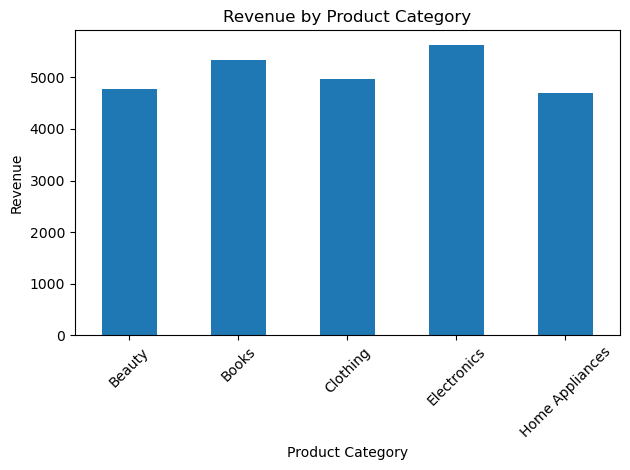

In [45]:
df_query.plot(kind='bar', x='Product Category', y='Total Quantity', legend=False)
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

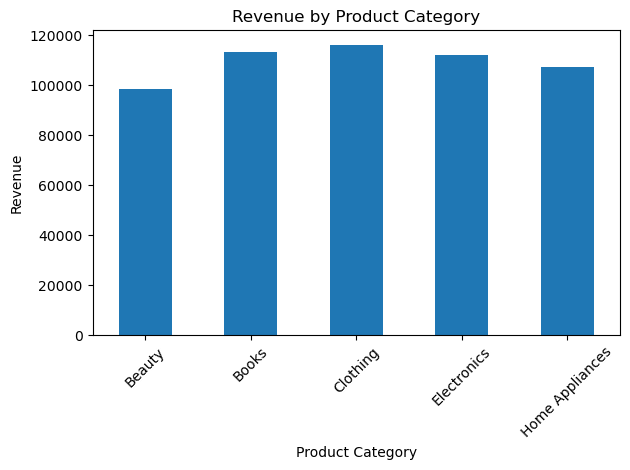

In [47]:
df_query.plot(kind='bar', x='Product Category', y='Revenue', legend=False)
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()